# Logistic Regression

In [12]:
# We would need these libraries to manage our dataset
# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
# Pandas: used for data manipulation and analysis
# matplotlib: used for visualisation and plotting graph/image/etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random

<function RandomState.seed>

In [2]:
# Import the iris dataset from sklearn
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn.datasets import load_iris
# load the dataset
iris = load_iris()
# only use the 100 elements, so we only have 2 classes, for binary classification
data = iris.data[:100]
y = iris.target[:100]
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

As usual we start by visualising our data, first in 2d as we did before, and then in one dimension, in the same way we saw it in the slides. 

[]

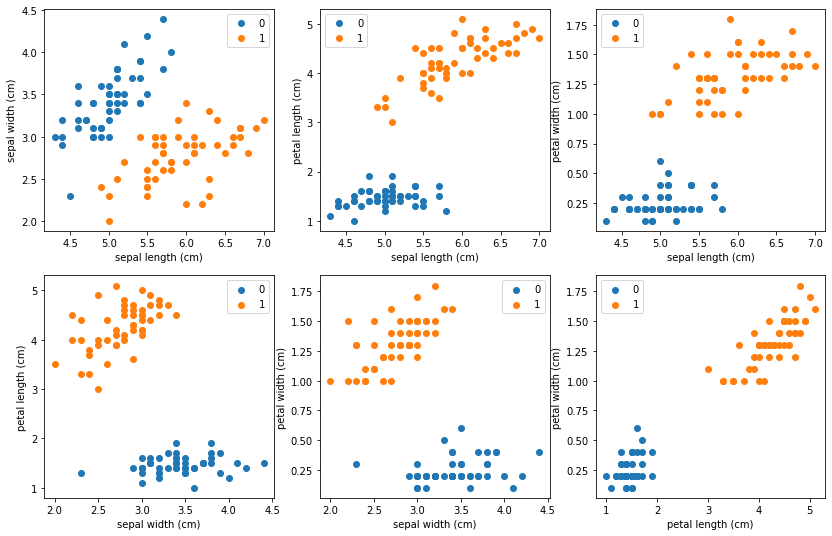

In [3]:
# plotting
fig, axs = plt.subplots(2,3, figsize=(14,9))
color = ['tab:blue', 'tab:orange']
# plot points
for i in np.unique(y):
    idx = y == i
    axs[0][0].scatter(data[:,0][idx], data[:,1][idx], c=color[int(i)], label=i)
    axs[0][1].scatter(data[:,0][idx], data[:,2][idx], c=color[int(i)], label=i)
    axs[0][2].scatter(data[:,0][idx], data[:,3][idx], c=color[int(i)], label=i)
    axs[1][0].scatter(data[:,1][idx], data[:,2][idx], c=color[int(i)], label=i)
    axs[1][1].scatter(data[:,1][idx], data[:,3][idx], c=color[int(i)], label=i)
    axs[1][2].scatter(data[:,2][idx], data[:,3][idx], c=color[int(i)], label=i)
# add x and y label
for i in range(3):
    axs[0][i].set_xlabel('sepal length (cm)')
for i in range(2):
    axs[1][i].set_xlabel('sepal width (cm)')
axs[1][2].set_xlabel('petal length (cm)')
axs[0][0].set_ylabel('sepal width (cm)')
axs[0][1].set_ylabel('petal length (cm)')
axs[0][2].set_ylabel('petal width (cm)')
axs[1][0].set_ylabel('petal length (cm)')
axs[1][1].set_ylabel('petal width (cm)')
axs[1][2].set_ylabel('petal width (cm)')
# legend
for i in range(3):
    for j in range(2):
        axs[j][i].legend()
plt.plot()

[]

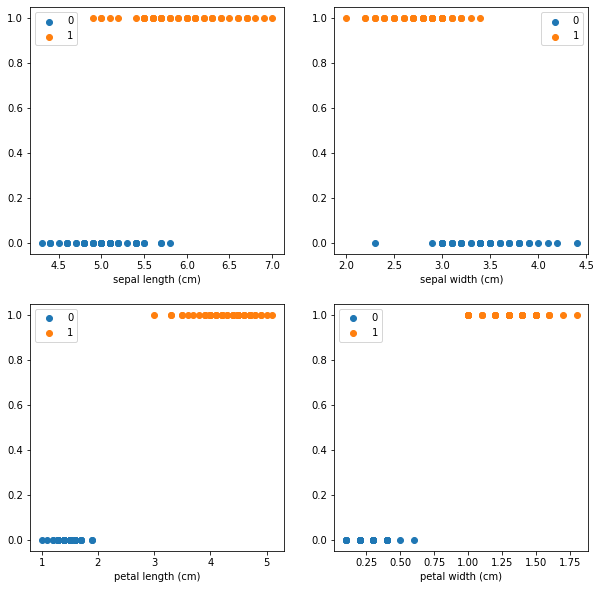

In [4]:
# plotting
fig, axs = plt.subplots(2,2, figsize=(10,10))
color = ['tab:blue', 'tab:orange']
# plot points
for i in np.unique(y):
    idx = y == i
    axs[0][0].scatter(data[:,0][idx], y[idx], c=color[int(i)], label=i)
    axs[0][1].scatter(data[:,1][idx], y[idx], c=color[int(i)], label=i)
    axs[1][0].scatter(data[:,2][idx], y[idx], c=color[int(i)], label=i)
    axs[1][1].scatter(data[:,3][idx], y[idx], c=color[int(i)], label=i)
# add x label
axs[0][0].set_xlabel('sepal length (cm)')
axs[0][1].set_xlabel('sepal width (cm)')
axs[1][0].set_xlabel('petal length (cm)')
axs[1][1].set_xlabel('petal width (cm)')
# legend
for i in range(2):
    for j in range(2):
        axs[j][i].legend()
plt.plot()

We create multiple small dataset, for each features, so it's easier to follow what happens, instead of calling `data[:,c]` everytime we want the $c^{th}$ column

In [5]:
# one dimensional dataset
X0 = data[:,0].reshape(-1,1)
X1 = data[:,1].reshape(-1,1)
X2 = data[:,2].reshape(-1,1)
X3 = data[:,3].reshape(-1,1)
# two dimensional dataset
X01= data[:,:2]
X23 = data[:,2:]

Them we create our logistic regression model. We create one for each of our 1 dimensional dataset, and we train them

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
clf0 = LogisticRegression().fit(X0,y)
clf1 = LogisticRegression().fit(X1,y)
clf2 = LogisticRegression().fit(X2,y)
clf3 = LogisticRegression().fit(X3,y)

We didn't create a training and testing dataset, so we will test the classifiers directly on the entire dataset. 

In [7]:
print('Acc clf0', clf0.score(X0, y))
print('Acc clf1', clf1.score(X1, y))
print('Acc clf2', clf2.score(X2, y))
print('Acc clf3', clf3.score(X3, y))

Acc clf0 0.89
Acc clf1 0.84
Acc clf2 1.0
Acc clf3 1.0


We will visualise the result of our classification. The idea is to colour the data using the classification done by the model, but use the X,y data as coordinate for the data. This way we can easily realise if the data is well classified or not

[]

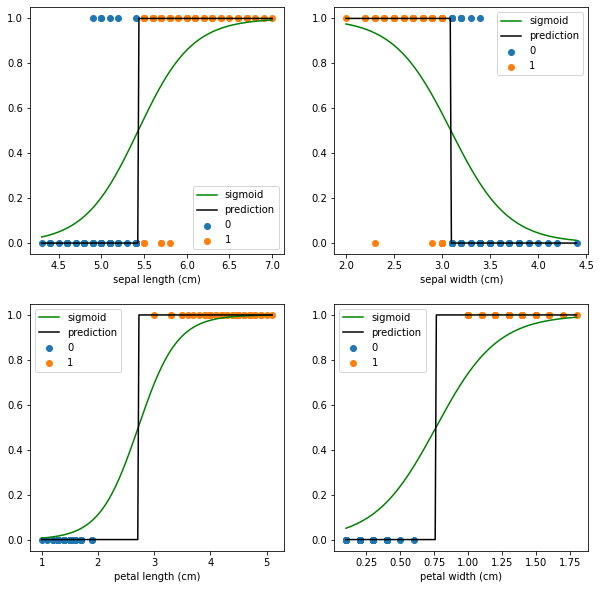

In [8]:
# color display
clfs = [clf0, clf1, clf2, clf3]
predict = [clf0.predict(X0), clf1.predict(X1), clf2.predict(X2), clf3.predict(X3)]
# graph lines
pxs = [np.linspace(data[:,i].min() ,data[:,i].max(), 200).reshape(-1,1) for i in range(len(clfs))]
# sigmoid
pys = [clfs[i].predict_proba(pxs[i])[:,1] for i in range(len(clfs))]
# separator
pys2 = [clfs[i].predict(pxs[i]) for i in range(len(clfs))]
# plotting
fig, axs = plt.subplots(2,2, figsize=(10,10))
color = ['tab:blue', 'tab:orange']
# plot point
for i in np.unique(y):
    for j in range(len(predict)):
        idx = predict[j] == i
        axs[j//2][j%2].scatter(data[:,j][idx], y[idx], c=color[int(i)], label=i)
# plot lines
for i in range(len(clfs)):
    axs[i//2][i%2].plot(pxs[i], pys[i], c='green', label='sigmoid')
    axs[i//2][i%2].plot(pxs[i], pys2[i], c='black', label='prediction')
# add x label
axs[0][0].set_xlabel('sepal length (cm)')
axs[0][1].set_xlabel('sepal width (cm)')
axs[1][0].set_xlabel('petal length (cm)')
axs[1][1].set_xlabel('petal width (cm)')
# legend
for i in range(2):
    for j in range(2):
        axs[j][i].legend()
plt.plot()

We will take a look at two dimensional dataset now. As usual with scikit-learn, the coding part works the same for any dimension, and the difference come when we do visualisation.

In [9]:
clf01 = LogisticRegression().fit(X01,y)
clf23 = LogisticRegression().fit(X23,y)

In [10]:
print('Acc clf01', clf01.score(X01, y))
print('Acc clf23', clf23.score(X23, y))

Acc clf01 1.0
Acc clf23 1.0


[]

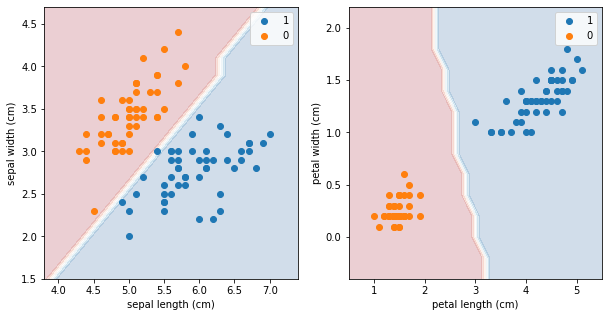

In [11]:
# color display
clfs = [clf01, clf23]
predict = [clf01.predict(X01), clf23.predict(X23)]
# plotting
fig, axs = plt.subplots(1,2, figsize=(10,5))
cmap=plt.cm.RdBu #  color map
# colour the background
for i in range(len(clfs)):
    x_min, x_max = data[:, i*2].min() - .5, data[:, i*2].max() + .5 #  range
    y_min, y_max = data[:, i*2+1].min() - .5, data[:, i*2+1].max() + .5 #  range
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2)) #  grid of value to classify
    Z = clfs[i].predict_proba(np.c_[xx.ravel(), yy.ravel()]) #  output for each value of the grid
    Z = np.argmax(Z, axis=1).reshape(xx.shape) #  which classes
    axs[i].set_xlim(xx.min(), xx.max()) #  set range
    axs[i].set_ylim(yy.min(), yy.max()) #  set range
    axs[i].contourf(xx, yy, Z, cmap=cmap, alpha=0.2) #  add the colour
# plot point
for i in np.unique(y)[::-1]:
    for j in range(len(predict)):
        idx = predict[j] == i
        axs[j].scatter(data[:,j*2][idx], data[:, j*2+1][idx], cmap=cmap, label=i)
# add x and y label
axs[0].set_xlabel('sepal length (cm)')
axs[0].set_ylabel('sepal width (cm)')
axs[1].set_xlabel('petal length (cm)')
axs[1].set_ylabel('petal width (cm)')
# legend
for i in range(2):
    axs[i].legend()
plt.plot()